**Cross-Selling and Up-Selling
Recommendation**

Cross-selling is a sales technique used to get a
customer to spend more by purchasing a
product that’s related to what’s being bought
already.

Up-selling is a sales technique where a seller
induces the customer to purchase more
expensive items, upgrades or other add-ons in
an attempt to make a more profitable sale.



In [ ]:
import csv
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os 
path_Data ='//content//gdrive//MyDrive//Grocery_Lesson 3//'
checkPath = os.path.isdir(path_Data)
checkFile= os.path.isfile(path_Data+'grocery_dataset.txt')
print(checkPath,checkFile)

True True


In [ ]:
#Detele the same element
grocery_items = set()
#read file and take input data
with open(path_Data +'grocery_dataset.txt') as f:
  reader = csv.reader(f, delimiter=",")
  for i,line in enumerate(reader):
    grocery_items.update(line)


In [ ]:
#check data
display("-".join(grocery_items))
print(len(grocery_items))

'chewing gum-dental care-cleaner-long life bakery product-turkey-ketchup-berries-condensed milk-detergent-pet care-specialty fat-yogurt-cream cheese -chocolate-dish cleaner-rubbing alcohol-meat-liquor-soups-vinegar-cocoa drinks-mustard-salty snack-mayonnaise-kitchen utensil-margarine-beef-sliced cheese-canned fish-syrup-cake bar-light bulbs-salad dressing-brandy-liver loaf-spread cheese-liqueur-cat food-flower (seeds)-finished products-butter-cream-hard cheese-specialty cheese-sound storage medium-white bread-jam-candy-seasonal products-nuts/prunes-brown bread-spices-frozen chicken-bags-canned vegetables-kitchen towels-cookware-onions-waffles-chocolate marshmallow-pot plants-chicken-whole milk-ice cream-misc. beverages-instant coffee-herbs-UHT-milk-prosecco-whisky-pasta-napkins-pip fruit-butter milk-newspapers-bottled beer-canned fruit-rum-rice-dishes-sparkling wine-zwieback-processed cheese-pork-honey-ham-beverages-skin care-frozen dessert-softener-cling film/bags-fish-red/blush wine-

169


In [ ]:
output_list =list()
with open(path_Data+'grocery_dataset.txt') as f:
  reader = csv.reader(f,delimiter=",")
  for i, line in enumerate(reader):
    row_val={item:0 for item in grocery_items}
    #update() like append() but for dictionary
    row_val.update({item:1 for item in line})
    output_list.append(row_val)

In [ ]:
print(len(output_list),len(output_list[0]))
print(output_list[:5])

9835 169
[{'chewing gum': 0, 'dental care': 0, 'cleaner': 0, 'long life bakery product': 0, 'turkey': 0, 'ketchup': 0, 'berries': 0, 'condensed milk': 0, 'detergent': 0, 'pet care': 0, 'specialty fat': 0, 'yogurt': 0, 'cream cheese ': 0, 'chocolate': 0, 'dish cleaner': 0, 'rubbing alcohol': 0, 'meat': 0, 'liquor': 0, 'soups': 0, 'vinegar': 0, 'cocoa drinks': 0, 'mustard': 0, 'salty snack': 0, 'mayonnaise': 0, 'kitchen utensil': 0, 'margarine': 1, 'beef': 0, 'sliced cheese': 0, 'canned fish': 0, 'syrup': 0, 'cake bar': 0, 'light bulbs': 0, 'salad dressing': 0, 'brandy': 0, 'liver loaf': 0, 'spread cheese': 0, 'liqueur': 0, 'cat food': 0, 'flower (seeds)': 0, 'finished products': 0, 'butter': 0, 'cream': 0, 'hard cheese': 0, 'specialty cheese': 0, 'sound storage medium': 0, 'white bread': 0, 'jam': 0, 'candy': 0, 'seasonal products': 0, 'nuts/prunes': 0, 'brown bread': 0, 'spices': 0, 'frozen chicken': 0, 'bags': 0, 'canned vegetables': 0, 'kitchen towels': 0, 'cookware': 0, 'onions': 0,

In [ ]:
grocery_df = pd.DataFrame(output_list)

In [ ]:
print(grocery_df.shape)
display(grocery_df.head())

(9835, 169)


,chewing gum,dental care,cleaner,long life bakery product,turkey,ketchup,berries,condensed milk,detergent,pet care,specialty fat,yogurt,cream cheese,chocolate,dish cleaner,rubbing alcohol,meat,liquor,soups,vinegar,cocoa drinks,mustard,salty snack,mayonnaise,kitchen utensil,margarine,beef,sliced cheese,canned fish,syrup,cake bar,light bulbs,salad dressing,brandy,liver loaf,spread cheese,liqueur,cat food,flower (seeds),finished products,...,cereals,tropical fruit,specialty bar,roll products,potato products,frozen potato products,abrasive cleaner,rolls/buns,shopping bags,baby food,semi-finished bread,male cosmetics,sugar,ready soups,cooking chocolate,flower soil/fertilizer,house keeping products,baby cosmetics,pastry,bathroom cleaner,snack products,fruit/vegetable juice,flour,frozen fruits,hair spray,meat spreads,frankfurter,grapes,frozen vegetables,tidbits,packaged fruit/vegetables,sausage,specialty chocolate,pickled vegetables,liquor (appetizer),sweet spreads,coffee,Instant food products,curd,pudding powder
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


From this table, we can see this data is a list of food customers bought.

Each customer is a row and a number of a column is the quantity of food they bought

In [ ]:
# View top sold items
total_item_count = sum(grocery_df.sum())
print(total_item_count)
#sort the values 
item_summary_df = grocery_df.sum().sort_values(ascending = False).reset_index().head(n=20)
item_summary_df.rename(columns={item_summary_df.columns[0]:'item_name',item_summary_df.columns[1]:'item_count'},inplace=True)
item_summary_df.head()



43367


,item_name,item_count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372


Text(0.5, 1.0, 'Item sales distribution')

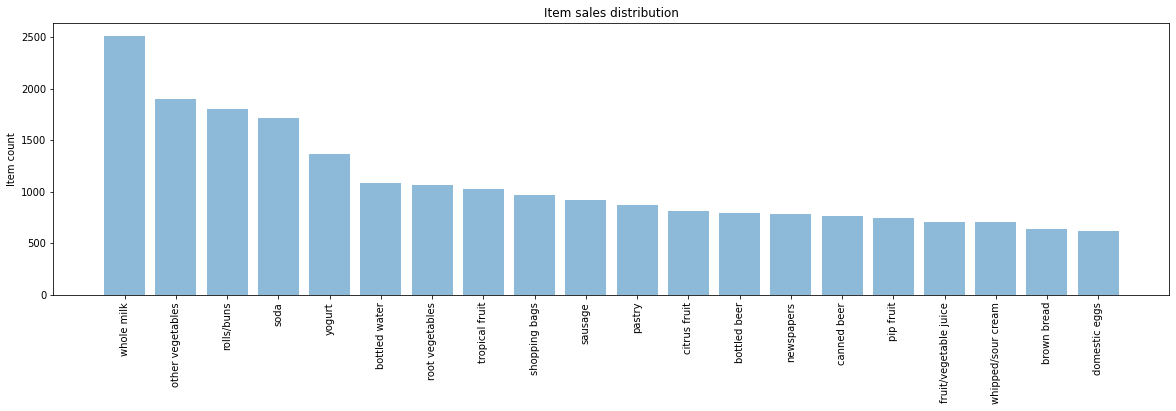

In [ ]:
#Visualize top sold items
objects = (list(item_summary_df['item_name'].head(n=20)))
y_pos=np.arange(len(objects))
performance=list(item_summary_df['item_count'].head(n=20))

plt.figure(figsize=(20,5))
plt.bar(y_pos,performance,align='center',alpha=0.5)
plt.xticks(y_pos,objects,rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')

In [ ]:
#Analyze items contributin to top sales
item_summary_df['item_perc']=item_summary_df['item_count']/total_item_count
item_summary_df['total_perc']=item_summary_df.item_perc.cumsum()
item_summary_df.head(10)

,item_name,item_count,item_prec,total_prec,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542,0.041714,0.143542
3,soda,1715,0.039546,0.183089,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651,0.022344,0.310651
9,sausage,924,0.021307,0.331957,0.021307,0.331957


In [ ]:
#Analyze items contributing to top 50% of sales
item_summary_df[item_summary_df.total_perc <= 0.5].shape

(19, 6)

In [ ]:
item_summary_df[item_summary_df.total_perc<=0.5]

,item_name,item_count,item_prec,total_prec,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542,0.041714,0.143542
3,soda,1715,0.039546,0.183089,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725,0.031637,0.214725
5,bottled water,1087,0.025065,0.239791,0.025065,0.239791
6,root vegetables,1072,0.024719,0.264510,0.024719,0.264510
7,tropical fruit,1032,0.023797,0.288307,0.023797,0.288307
8,shopping bags,969,0.022344,0.310651,0.022344,0.310651
9,sausage,924,0.021307,0.331957,0.021307,0.331957


In [ ]:
#Prime Dataset for frequently purchased items
input_df=grocery_df.copy()
length_trans=2
total_sales_perc=0.4

item_count = input_df.sum().sort_values(ascending = False).reset_index()
total_items = sum(input_df.sum().sort_values(ascending = False))
item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'},inplace=True)
item_count['item_perc']=item_count['item_count']/total_items
item_count['total_perc']=item_count.item_perc.cumsum()

In [ ]:
display(item_count.head())

,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725


In [ ]:
selected_items=list(item_count[item_count.total_perc<total_sales_perc].item_name)
input_df['total_items']=input_df[selected_items].sum(axis=1)
input_df=input_df[input_df.total_items>=length_trans]

In [ ]:
display(item_count.head())

,item_name,item_count,item_perc,total_perc
0,whole milk,2513,0.057947,0.057947
1,other vegetables,1903,0.043881,0.101829
2,rolls/buns,1809,0.041714,0.143542
3,soda,1715,0.039546,0.183089
4,yogurt,1372,0.031637,0.214725


In [ ]:
output_df = input_df[selected_items]
item_counts = item_count[item_count.total_perc<total_sales_perc]

In [ ]:
display(output_df.head())
print(list(output_df.columns))
print(item_counts)

,whole milk,other vegetables,rolls/buns,soda,yogurt,bottled water,root vegetables,tropical fruit,shopping bags,sausage,pastry,citrus fruit,bottled beer
1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0,0,0,0,1
10,0,1,0,0,0,1,0,1,0,0,0,0,0


['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer']
           item_name  item_count  item_perc  total_perc
0         whole milk        2513   0.057947    0.057947
1   other vegetables        1903   0.043881    0.101829
2         rolls/buns        1809   0.041714    0.143542
3               soda        1715   0.039546    0.183089
4             yogurt        1372   0.031637    0.214725
5      bottled water        1087   0.025065    0.239791
6    root vegetables        1072   0.024719    0.264510
7     tropical fruit        1032   0.023797    0.288307
8      shopping bags         969   0.022344    0.310651
9            sausage         924   0.021307    0.331957
10            pastry         875   0.020177    0.352134
11      citrus fruit         814   0.018770    0.370904
12      bottled beer         792   0.018263    0.389167
